<a href="https://colab.research.google.com/github/LatiefDataVisionary/data-science-application-college-task/blob/main/Gemini_UAS_ADS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deskripsi Dataset**

Dataset Harga Rumah merupakan daftar harga rumah yang terbagi menjadi 2 data, yaitu data harga rumah daerah Jaksel dan data harga rumah daerah Tebet. Data diambil dan dikumpulkan dari beberapa website penjualan seperti rumah123.com

Berikut lini sumber dataset dari situs Kaggle: https://www.kaggle.com/datasets/wisnuanggara/daftar-harga-rumah

Dataset yang digunakan: HARGA RUMAH JAKSEL
Dataset harga rumah jaksel terdiri dari 7 kolom dengan jumlah data yaitu 1000 data. Kolom tersebut terdiri dari :

1. `HARGA` : harga dari rumah.
2. `LT` : jumlah luas tanah.
3. `LB` : jumlah luas bangunan.
4. `JKT` : jumlah kamar tidur.
5. `JKM` : jumlah kamar mandi.
6. `GRS` : garasi (ada/tidak ada)
7. `KOTA` : nama kota.

## **1. Persiapan Lingkungan dan Import Library**

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder

Langkah pertama dalam proses analisis adalah mempersiapkan lingkungan kerja dengan mengimpor seluruh library dan modul Python yang dibutuhkan. Setiap library memiliki peran spesifik dalam alur kerja analisis data dan pemodelan machine learning. Berikut adalah rincian library utama yang digunakan:

*   **Pandas (`pd`):** Library fundamental untuk manipulasi dan analisis data. Digunakan untuk memuat dataset dari file Excel, membuat struktur data dalam bentuk DataFrame, serta melakukan operasi pembersihan dan transformasi data.
*   **NumPy (`np`):** Library penting untuk komputasi numerik. Berperan dalam operasi matematika tingkat lanjut, seperti transformasi logaritmik, dan untuk menangani array numerik secara efisien.
*   **Matplotlib (`plt`) dan Seaborn (`sns`):** Dua library utama untuk visualisasi data. Matplotlib menyediakan fondasi untuk membuat plot statis seperti histogram, sementara Seaborn digunakan untuk membuat visualisasi statistik yang lebih menarik dan informatif, seperti heatmap matriks korelasi dan box plot.
*   **Scikit-learn (`sklearn`):** Library inti untuk implementasi *machine learning* di Python. Dari library ini, beberapa modul spesifik digunakan, yaitu:
    *   `model_selection`: Untuk membagi dataset menjadi data latih dan data uji (`train_test_split`) serta untuk melakukan *hyperparameter tuning* dengan validasi silang (`GridSearchCV`).
    *   `linear_model`, `tree`, `ensemble`: Untuk mengimpor algoritma-algoritma model regresi yang akan dievaluasi, yaitu `LinearRegression`, `DecisionTreeRegressor`, dan `RandomForestRegressor`.
    *   `metrics`: Untuk mengevaluasi kinerja model menggunakan metrik seperti `mean_absolute_error` (MAE) dan `r2_score` (R-Squared).
    *   `preprocessing`: Berisi alat untuk pra-pemrosesan data seperti `StandardScaler` (untuk standardisasi fitur), `OneHotEncoder` (untuk mengubah fitur kategorikal menjadi numerik), dan `PolynomialFeatures` (untuk membuat fitur interaksi).
    *   `compose` dan `pipeline`: Untuk membangun alur kerja pra-pemrosesan dan pemodelan yang sistematis, bersih, dan efisien menggunakan `ColumnTransformer` dan `Pipeline`.

Dengan mengimpor semua komponen ini di awal, proses analisis dapat berjalan dengan lancar dari tahap eksplorasi hingga evaluasi model.

## **2. Memuat dan Eksplorasi Data (Exploratory Data Analysis - EDA)**

### **2.1. Memuat Data**

Data yang dianalisis dalam proyek ini bersumber dari file Excel `HARGA RUMAH JAKSEL.xlsx` yang telah disimpan pada sebuah repositori GitHub untuk kemudahan akses. Proses pemuatan data dilakukan menggunakan fungsi `pd.read_excel()` dari library Pandas, dengan mengarahkan langsung ke URL mentah dari file tersebut. Untuk memastikan data dimuat dengan struktur yang benar, parameter `skiprows=[0]` digunakan untuk mengabaikan baris pertama pada file, dan parameter `header=0` ditetapkan agar baris selanjutnya secara otomatis diinterpretasikan sebagai nama-nama kolom DataFrame. Hasilnya, data mentah berhasil dimuat ke dalam DataFrame `df` yang terstruktur dan siap untuk dieksplorasi lebih lanjut.

In [2]:
path = 'https://github.com/LatiefDataVisionary/data-science-application-college-task/raw/refs/heads/main/datasets/HARGA%20RUMAH%20JAKSEL.xlsx'

# Melewati baris pertama dan menggunakan baris kedua sebagai nama kolom
df = pd.read_excel(path, skiprows=[0], header=0)

### **2.2. Analisis Deskriptif Awal**


Tahap ini untuk melihat gambaran umum dataset seperti 5 baris pertama, informasi tipe data, dan statistik dasar.


In [3]:
display(df.head())

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
0,28000000000,1100,700,5,6,ADA,JAKSEL
1,19000000000,824,800,4,4,ADA,JAKSEL
2,4700000000,500,400,4,3,ADA,JAKSEL
3,4900000000,251,300,5,4,ADA,JAKSEL
4,28000000000,1340,575,4,5,ADA,JAKSEL


Setelah data berhasil dimuat, langkah eksplorasi pertama adalah melakukan inspeksi visual terhadap beberapa baris awal data. Hal ini dilakukan dengan menggunakan fungsi `df.head()`, yang secara default menampilkan lima baris pertama dari DataFrame.

Output di atas menyajikan cuplikan langsung dari dataset. Dari tampilan ini, dapat dikonfirmasi bahwa proses pemuatan data berjalan dengan baik dan struktur kolom telah sesuai dengan deskripsi fitur yang ada, seperti kolom `HARGA` yang berisi nilai numerik besar, serta fitur-fitur lainnya seperti `LT` (Luas Tanah), `LB` (Luas Bangunan), dan seterusnya. Pemeriksaan awal ini sangat penting untuk memvalidasi hasil pemuatan data dan memberikan pemahaman intuitif pertama sebelum melangkah ke tahap analisis deskriptif statistik yang lebih formal.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   HARGA   1001 non-null   int64 
 1   LT      1001 non-null   int64 
 2   LB      1001 non-null   int64 
 3   JKT     1001 non-null   int64 
 4   JKM     1001 non-null   int64 
 5   GRS     1001 non-null   object
 6   KOTA    1001 non-null   object
dtypes: int64(5), object(2)
memory usage: 54.9+ KB


In [5]:
df.describe(include='all')

,HARGA,LT,LB,JKT,JKM,GRS,KOTA
count,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001,1001
unique,NaN,NaN,NaN,NaN,NaN,2,1
top,NaN,NaN,NaN,NaN,NaN,ADA,JAKSEL
freq,NaN,NaN,NaN,NaN,NaN,779,1001
mean,1.747472e+10,530.504496,487.275724,4.457542,3.940060,NaN,NaN
std,2.079548e+10,531.069773,452.872262,2.004606,1.903261,NaN,NaN
min,4.300000e+08,22.000000,38.000000,1.000000,1.000000,NaN,NaN
25%,6.750000e+09,220.000000,300.000000,4.000000,3.000000,NaN,NaN
50%,1.350000e+10,400.000000,411.000000,4.000000,4.000000,NaN,NaN
75%,2.000000e+10,677.000000,600.000000,5.000000,4.000000,NaN,NaN


### **2.3. Penanganan Data Duplikat**


In [6]:
# cek dan hapus duplikat
duplicated_rows = df.duplicated().sum()
print(f'Jumlah baris duplikat sebelum dihapus: {duplicated_rows}')

# menghapus baris duplicate
df.drop_duplicates(inplace=True)
print(f'Jumlah baris duplikat setelah dihapus: {df.duplicated().sum()}')
print(f'Ukuran data setelah memghapus duplikat: {df.shape}')

Jumlah baris duplikat sebelum dihapus: 70
Jumlah baris duplikat setelah dihapus: 0
Ukuran data setelah memghapus duplikat: (931, 7)


Untuk menjaga integritas dan kualitas data, dilakukan proses identifikasi dan penghapusan data duplikat. Data duplikat dapat memberikan bobot yang tidak semestinya pada observasi tertentu dan mengganggu performa model. Hasil pemeriksaan awal menunjukkan adanya **70 baris data yang duplikat**.

Dengan menggunakan fungsi `df.drop_duplicates()`, semua baris yang berulang tersebut berhasil dihapus dari dataset. Hasilnya, dataset yang kini bersih dari duplikasi memiliki ukuran **931 baris dan 7 kolom**, dan siap untuk analisis lebih lanjut.


### **2.4. Menangani Nilai yang Hilang**

In [7]:
# Cek jumlah nilai yang hilang per kolom
print("Jumlah nilai yang hilang per kolom:")
print(df.isnull().sum())

Jumlah nilai yang hilang per kolom:
HARGA    0
LT       0
LB       0
JKT      0
JKM      0
GRS      0
KOTA     0
dtype: int64


Langkah pembersihan data selanjutnya adalah memeriksa keberadaan nilai yang hilang atau *null* pada setiap kolom. Nilai yang hilang dapat secara signifikan memengaruhi kualitas dan performa model, sehingga perlu diidentifikasi dan ditangani dengan tepat.

Untuk melakukan pemeriksaan, metode `isnull().sum()` dari Pandas digunakan pada DataFrame. Metode ini menghitung jumlah nilai *null* untuk setiap kolom. Sebagaimana ditunjukkan oleh output di atas, hasil pemeriksaan menunjukkan bahwa **tidak terdapat nilai yang hilang** pada seluruh kolom dalam dataset. Hal ini menandakan bahwa data sudah cukup lengkap dan tidak memerlukan teknik imputasi atau penghapusan baris terkait nilai yang hilang.

### **2.5. Melihat Distribusi Fitur Numerik dan Kategorikal**

Untuk memahami karakteristik dan sebaran data secara lebih mendalam, dilakukan visualisasi distribusi untuk fitur numerik dan fitur kategorikal. Analisis ini sangat penting untuk mengidentifikasi pola, kemiringan (*skewness*), serta potensi adanya pencilan (*outlier*) atau fitur yang tidak memiliki variasi.


In [8]:
# # Menganalisis distribusi fitur numerik (HARGA, LT, LB, JKT, JKM)
# numerical_features = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']

# # Hitung jumlah baris dan kolom untuk subplot
# n_cols_num = 3  # Jumlah kolom subplot yang diinginkan untuk numerik
# n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num # menghitung jumlah baris yang dibutuhkan

# plt.figure(figsize=(5 * n_cols_num, 4 * n_rows_num))
# plt.suptitle('Distribusi Fitur Numerik', y=1.02, ha='center', fontsize='xx-large')

# for i, col in enumerate(numerical_features):
#     plt.subplot(n_rows_num, n_cols_num, i + 1)
#     df[col].hist(bins=30)
#     plt.title(f'Distribusi {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frekuensi')
#     plt.tight_layout()

# plt.show()


# # Menganalisis distribusi fitur kategorikal (GRS, KOTA)
# categorical_features = ['GRS', 'KOTA']

# # menghitung jumlah baris dan kolom untuk subplot
# n_cols = 2  # Jumlah kolom subplot yang diinginkan
# n_rows = (len(categorical_features) + n_cols - 1) // n_cols # menghitung jumlah baris yang dibutuhkan

# plt.figure(figsize=(8 * n_cols, 5 * n_rows))
# plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

# for i, col in enumerate(categorical_features):
#     plt.subplot(n_rows, n_cols, i + 1)
#     sns.countplot(data=df, x=col)
#     plt.title(f'Distribusi Fitur Kategorikal: {col}')
#     plt.ylabel('Frekuensi')
#     plt.tight_layout()

# plt.show()

#### **2.5.1. Distribusi Fitur Numerik**

Visualisasi distribusi fitur numerik dilakukan menggunakan histogram untuk melihat sebaran frekuensi dari setiap nilai.

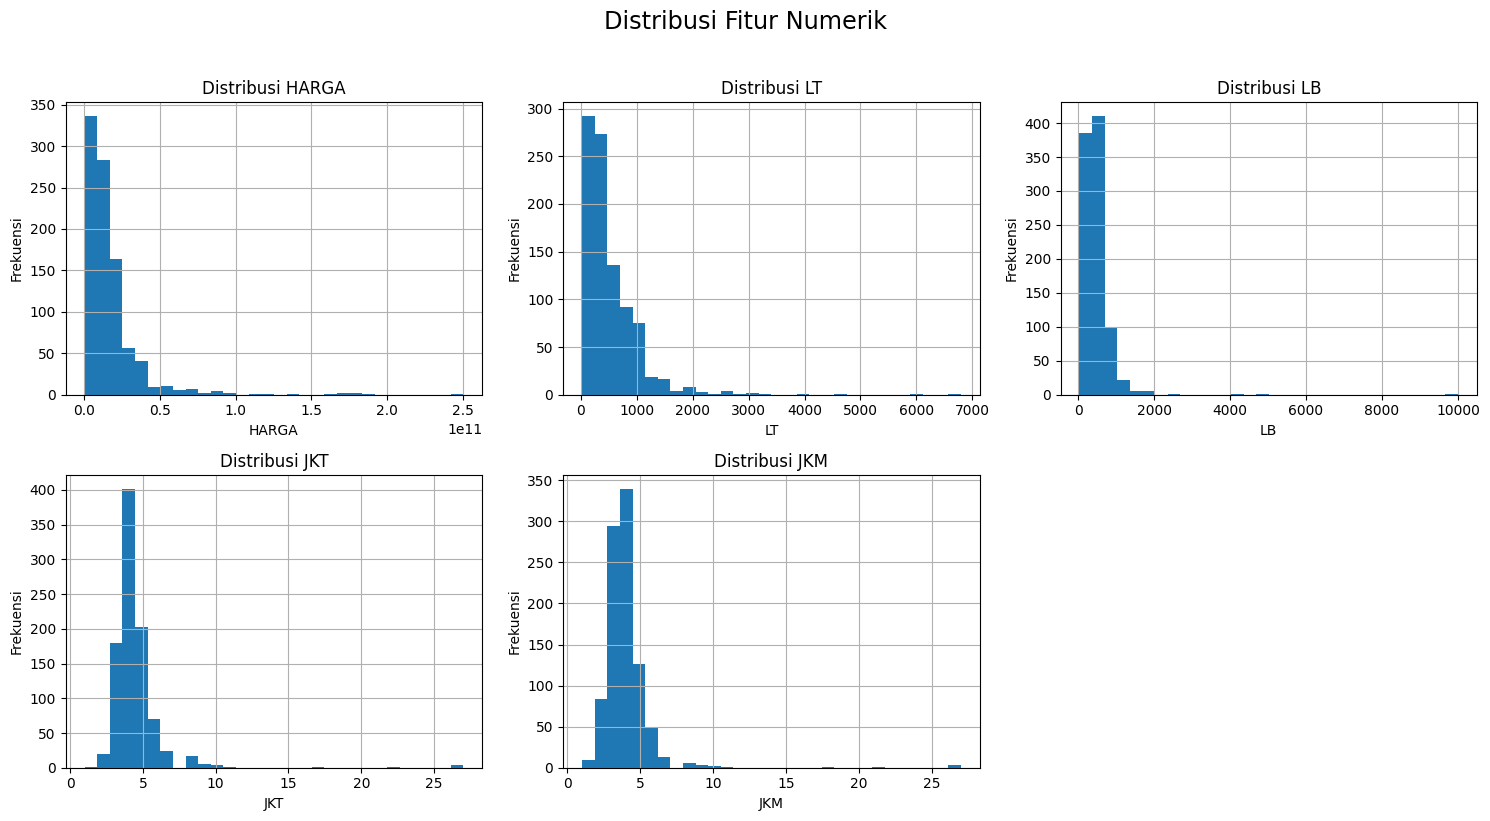

In [9]:
# Menganalisis distribusi fitur numerik (HARGA, LT, LB, JKT, JKM)
numerical_features = ['HARGA', 'LT', 'LB', 'JKT', 'JKM']

# Hitung jumlah baris dan kolom untuk subplot
n_cols_num = 3  # Jumlah kolom subplot yang diinginkan untuk numerik
n_rows_num = (len(numerical_features) + n_cols_num - 1) // n_cols_num # menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(5 * n_cols_num, 4 * n_rows_num))
plt.suptitle('Distribusi Fitur Numerik', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(numerical_features):
    plt.subplot(n_rows_num, n_cols_num, i + 1)
    df[col].hist(bins=30)
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.show()

Berdasarkan plot histogram di atas, dapat ditarik beberapa pengamatan penting:

*   **Distribusi Miring (Right-Skewed):** Fitur-fitur utama seperti `HARGA`, `LT` (Luas Tanah), dan `LB` (Luas Bangunan) menunjukkan distribusi yang sangat miring ke kanan. Ini berarti sebagian besar data terkonsentrasi pada nilai-nilai yang lebih rendah, namun terdapat sejumlah kecil data dengan nilai yang sangat tinggi. Kemiringan ini menjadi dasar pertimbangan untuk melakukan transformasi logaritmik di tahap *feature engineering* agar distribusinya lebih mendekati normal, yang umumnya baik untuk model regresi.
*   **Potensi Outlier:** Pada fitur `JKT` (Jumlah Kamar Tidur) dan `JKM` (Jumlah Kamar Mandi), terlihat ada beberapa batang frekuensi yang sangat jauh dari konsentrasi utama data (misalnya, jumlah kamar lebih dari 10). Hal ini mengindikasikan adanya *outlier* atau pencilan yang perlu dianalisis dan ditangani lebih lanjut.

#### **2.5.2. Distribusi Fitur Kategorikal**


Untuk fitur kategorikal, proporsi dari setiap kategori divisualisasikan menggunakan diagram batang (*bar plot*).

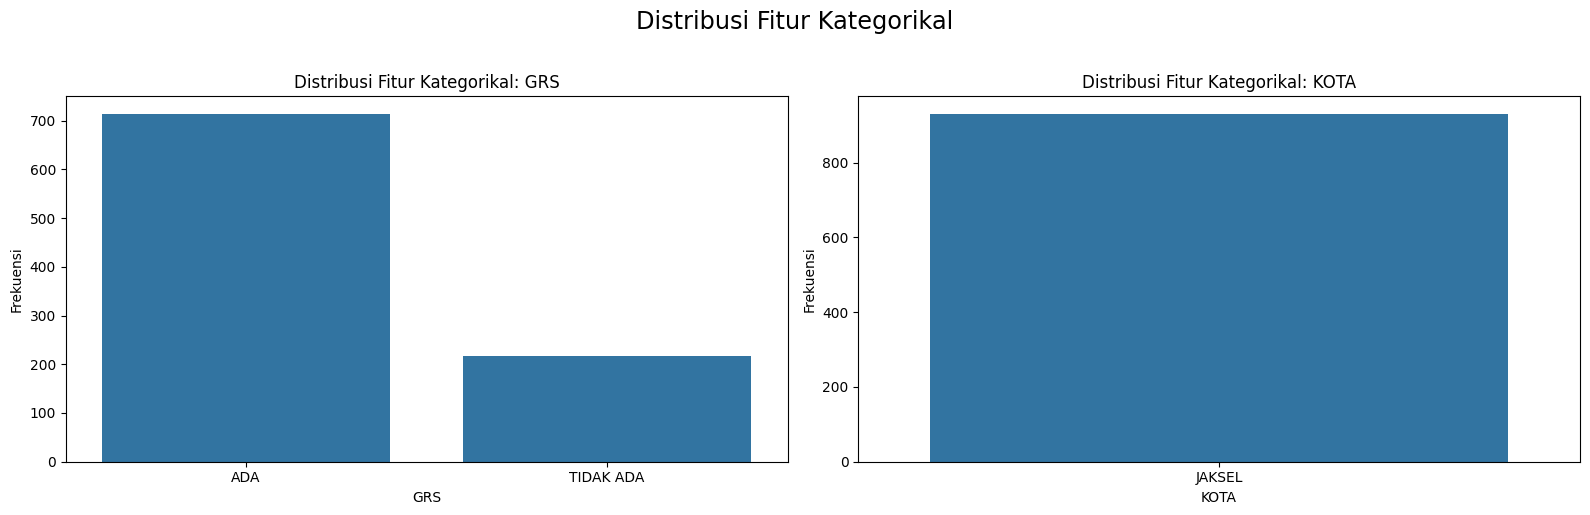

In [10]:
# Menganalisis distribusi fitur kategorikal (GRS, KOTA)
categorical_features = ['GRS', 'KOTA']

# menghitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 5 * n_rows))
plt.suptitle('Distribusi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df, x=col)
    plt.title(f'Distribusi Fitur Kategorikal: {col}')
    plt.ylabel('Frekuensi')
    plt.tight_layout()

plt.show()

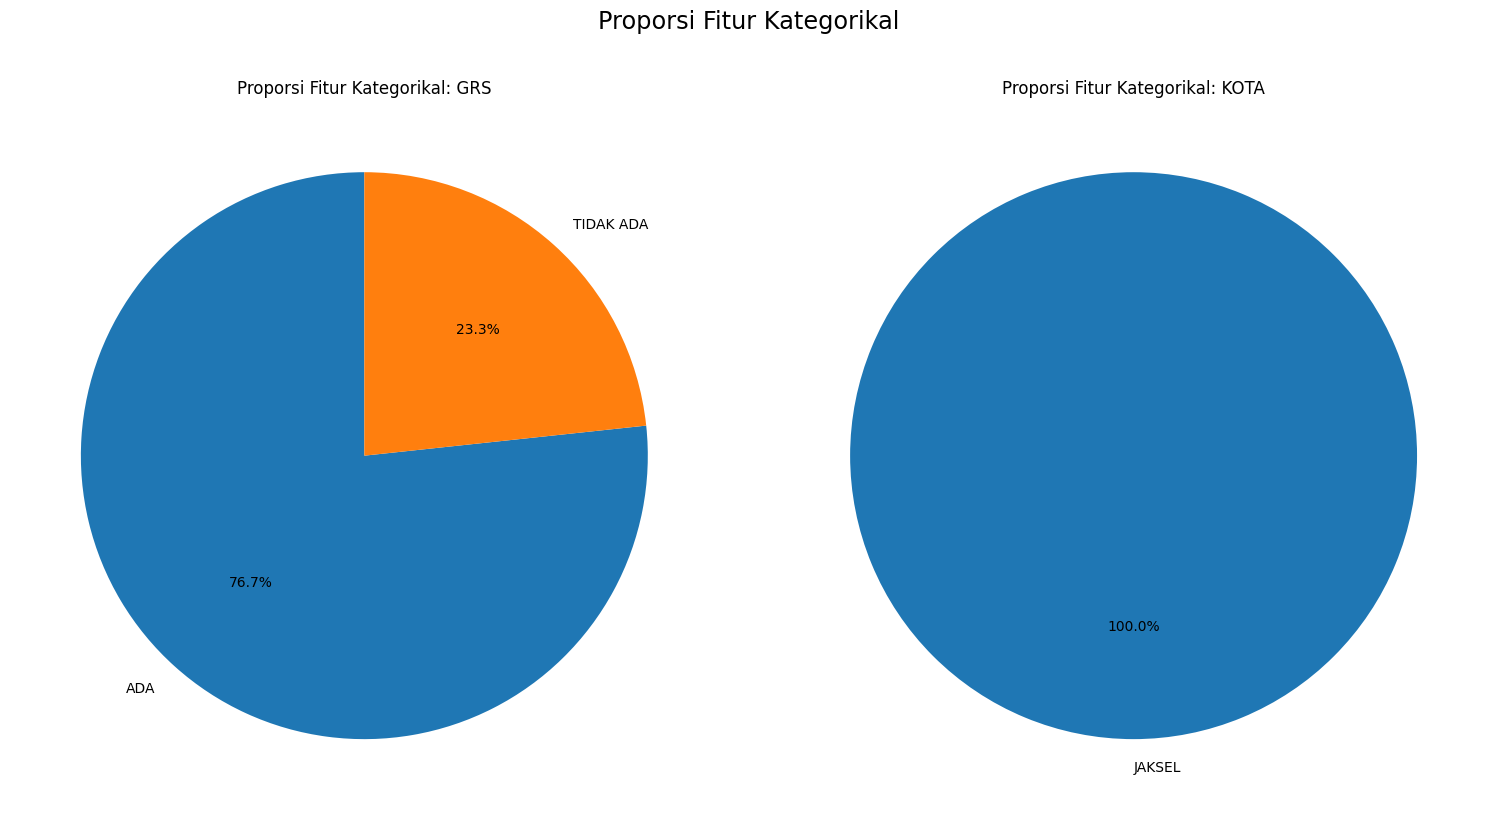

In [11]:
# Membuat pie plot untuk fitur kategorikal
categorical_features = ['GRS', 'KOTA']

# menghitung jumlah baris dan kolom untuk subplot
n_cols = 2  # Jumlah kolom subplot yang diinginkan
n_rows = (len(categorical_features) + n_cols - 1) // n_cols # menghitung jumlah baris yang dibutuhkan

plt.figure(figsize=(8 * n_cols, 8 * n_rows))
plt.suptitle('Proporsi Fitur Kategorikal', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features):
    plt.subplot(n_rows, n_cols, i + 1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90)
    plt.title(f'Proporsi Fitur Kategorikal: {col}')
    plt.ylabel('') # Menghilangkan label y default
    plt.tight_layout()

plt.show()

Dari visualisasi fitur kategorikal, diperoleh wawasan sebagai berikut:

*   **Fitur `GRS` (Garasi):** Sebagian besar rumah dalam dataset ini (sekitar 700+ dari 931 data bersih) memiliki garasi ("ADA"), sedangkan sisanya tidak memiliki garasi ("TIDAK ADA"). Distribusi yang tidak seimbang ini tetap informatif dan akan ditangani menggunakan teknik *one-hot encoding* pada tahap pra-pemrosesan.
*   **Fitur `KOTA` (Varians Nol):** Pengamatan yang paling signifikan adalah pada fitur `KOTA`. Plot menunjukkan bahwa **100% data** dalam kolom ini memiliki nilai tunggal, yaitu "JAKSEL". Fitur dengan varians nol seperti ini tidak memberikan informasi apa pun yang dapat digunakan model untuk membedakan data. Oleh karena itu, fitur ini akan dihapus pada tahap pembersihan data selanjutnya.

### **2.6. Penanganan Fitur Tidak Relevan (Zero Variance)**


Dari plot distribusi fitur `KOTA`, terlihat bahwa semua nilainya adalah "`JAKSEL`". Fitur seperti ini tidak memberikan informasi apa pun kepada model.
Kenapa Perlu Diperbaiki:
Fitur dengan varians nol (zero variance) tidak memiliki daya prediksi. Menghilangkannya akan menyederhanakan model tanpa mengurangi kualitasnya.

Berdasarkan analisis distribusi pada sub-bab sebelumnya (2.5.2), teridentifikasi bahwa fitur `KOTA` memiliki varians nol, di mana semua data memiliki nilai yang sama yaitu "JAKSEL". Fitur semacam ini tidak memberikan informasi variatif yang dapat digunakan oleh model *machine learning* untuk belajar atau membuat perbedaan antar data. Dengan kata lain, fitur dengan varians nol tidak memiliki daya prediksi.

Untuk mengonfirmasi temuan ini secara programatik dan sebagai bagian dari langkah pembersihan data, dilakukan pengecekan jumlah nilai unik pada setiap kolom. Kode di atas secara eksplisit menunjukkan bahwa kolom `KOTA` memang hanya memiliki **1 nilai unik**.


In [12]:
print('Nilai unik di setiap kolom (menampilkan 15 nilai unik pertama untuk efisiensi):')
for col in df.columns:
  print(f'- {col}: {df[col].nunique()} nilai unik -> {df[col].unique()[:15]}')

# Kolom 'KOTA' hanya memiliki 1 nilai unik, shg tdk informatif, maka dihapus.
df.drop(['KOTA'], axis=1, inplace=True)
print('\nUkuran data sekarang:', df.shape)

Nilai unik di setiap kolom (menampilkan 15 nilai unik pertama untuk efisiensi):
- HARGA: 266 nilai unik -> [28000000000 19000000000  4700000000  4900000000 10000000000  7600000000
  5250000000   670000000   480000000 10700000000  4200000000  8500000000
  7000000000 20000000000  9500000000]
- LT: 425 nilai unik -> [1100  824  500  251 1340  460  278  511   70   66  449  109  320  384
  462]
- LB: 241 nilai unik -> [700 800 400 300 575 350  69  42 500 188 250 645 450 285 200]
- JKT: 14 nilai unik -> [ 5  4  3  2  6  9  8  7 10 17 11  1 27 22]
- JKM: 14 nilai unik -> [ 6  4  3  5  2  1  7  8  9 18 11 21 27 10]
- GRS: 2 nilai unik -> ['ADA' 'TIDAK ADA']
- KOTA: 1 nilai unik -> ['JAKSEL']

Ukuran data sekarang: (931, 6)


Menyertakan fitur ini dalam proses pemodelan tidak akan memberikan manfaat dan justru menambah kompleksitas yang tidak perlu. Oleh karena itu, untuk menyederhanakan model dan meningkatkan efisiensi komputasi tanpa mengurangi kualitas prediktif, fitur `KOTA` dihapus dari DataFrame. Setelah penghapusan, ukuran dataset menjadi **931 baris dan 6 kolom**, siap untuk analisis korelasi dan tahap pemodelan selanjutnya.

### **2.7. Melihat Nilai Korelasi Antar Fitur**

In [13]:
# # Korelasi antar fitur numerik
# correlation_matrix = df[numerical_features].corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
# plt.title('Matrix Korelasi Fitur Numerik')
# plt.show()

# # # Scatter plot antara fitur numerik dengan HARGA
# # numerical_features_for_scatter = ['LT', 'LB', 'JKT', 'JKM']
# # n_cols_scatter = 2
# # n_rows_scatter = (len(numerical_features_for_scatter) + n_cols_scatter - 1) // n_cols_scatter

# # plt.figure(figsize=(8 * n_cols_scatter, 6 * n_rows_scatter))
# # plt.suptitle('Hubungan antara Fitur Numerik dan HARGA', y=1.02, ha='center', fontsize='xx-large')

# # for i, col in enumerate(numerical_features_for_scatter):
# #     plt.subplot(n_rows_scatter, n_cols_scatter, i + 1)
# #     sns.scatterplot(data=df, x=col, y='HARGA')
# #     plt.title(f'{col} vs HARGA')
# #     plt.tight_layout()

# # plt.show()


# # Box plot atau violin plot utk melihat hubungan fitur kategorikal dg HARGA
# categorical_features_for_box = ['GRS']
# n_cols_box = 1 # Adjust to 1 as only one categorical feature remains
# n_rows_box = (len(categorical_features_for_box) + n_cols_box - 1) // n_cols_box

# plt.figure(figsize=(8 * n_cols_box, 6 * n_rows_box))
# plt.suptitle('Hubungan antara Fitur Kategorikal dan HARGA', y=1.02, ha='center', fontsize='xx-large')

# for i, col in enumerate(categorical_features_for_box):
#     plt.subplot(n_rows_box, n_cols_box, i + 1)
#     sns.boxplot(data=df, x=col, y='HARGA')
#     plt.title(f'{col} vs HARGA')
#     plt.tight_layout()

# plt.show()

Setelah data dibersihkan, langkah selanjutnya adalah menganalisis hubungan antar fitur, khususnya hubungan antara fitur-fitur prediktor dengan fitur target (`HARGA`). Analisis ini bertujuan untuk mendapatkan wawasan awal mengenai variabel mana yang paling potensial untuk memprediksi harga rumah.

#### **2.7.1. Korelasi Antar Fitur Numerik**

Untuk mengukur kekuatan hubungan linear antar fitur-fitur numerik, sebuah matriks korelasi dibuat dan divisualisasikan menggunakan *heatmap*. Heatmap ini menyajikan koefisien korelasi Pearson, dengan nilai mendekati 1 (warna merah tua) menunjukkan korelasi positif yang kuat, dan nilai mendekati -1 (warna biru tua) menunjukkan korelasi negatif yang kuat.


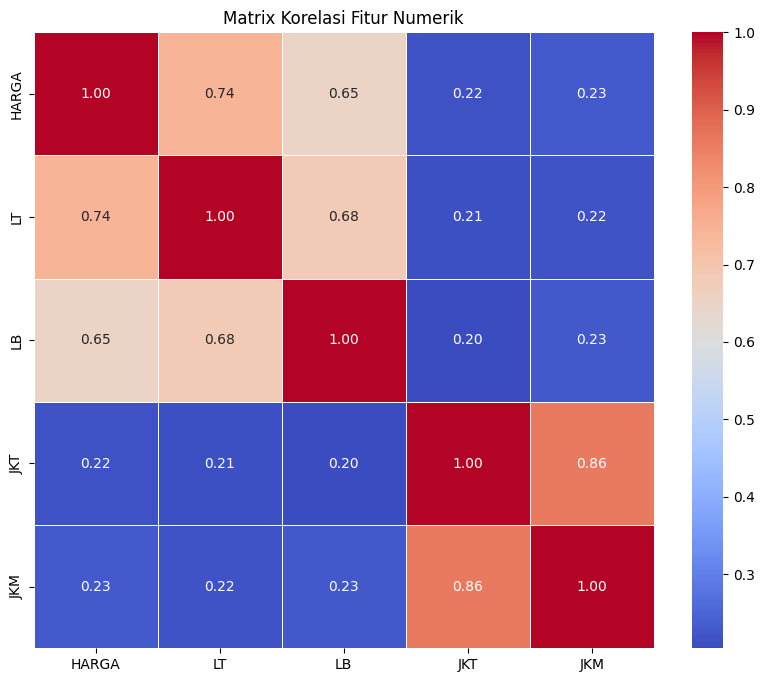

In [14]:
# Korelasi antar fitur numerik
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Matrix Korelasi Fitur Numerik')
plt.show()

Dari heatmap matriks korelasi, dapat disimpulkan beberapa hal:

*   **Korelasi Positif Kuat dengan `HARGA`**: Fitur `LT` (Luas Tanah) dan `LB` (Luas Bangunan) memiliki korelasi positif yang kuat dengan `HARGA`, dengan koefisien masing-masing sebesar **0.74** dan **0.65**. Hal ini sesuai dengan intuisi bahwa semakin besar luas tanah dan bangunan, maka semakin tinggi pula harga rumah.
*   **Multikolinearitas Antar Prediktor**: Terdapat korelasi yang cukup kuat antara `LT` dan `LB` (0.68), yang menandakan adanya potensi multikolinearitas. Selain itu, fitur `JKT` (Jumlah Kamar Tidur) dan `JKM` (Jumlah Kamar Mandi) menunjukkan korelasi yang sangat tinggi satu sama lain (**0.86**). Multikolinearitas yang tinggi antar fitur prediktor ini perlu menjadi perhatian karena dapat memengaruhi interpretasi koefisien pada model regresi linear.
*   **Korelasi Rendah**: Fitur `JKT` dan `JKM` memiliki korelasi yang relatif rendah dengan `HARGA` (0.22 dan 0.23).

#### **2.7.2. Hubungan Fitur Kategorikal dengan Harga**

Untuk menganalisis hubungan antara fitur kategorikal `GRS` (Garasi) dengan fitur target numerik `HARGA`, visualisasi *box plot* digunakan. Box plot efektif untuk membandingkan distribusi harga antara dua kategori (rumah yang "ADA" garasi dan yang "TIDAK ADA").

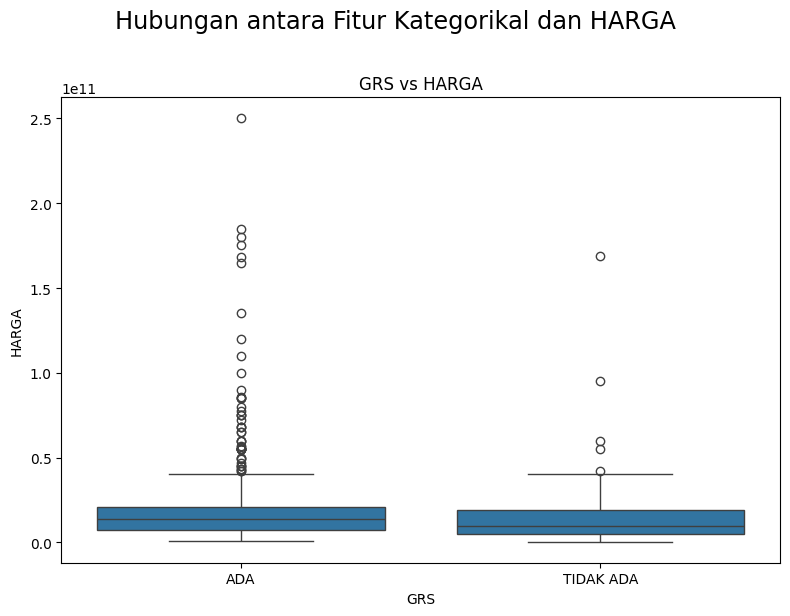

In [15]:
# Box plot atau violin plot utk melihat hubungan fitur kategorikal dg HARGA
categorical_features_for_box = ['GRS']
n_cols_box = 1 # Adjust to 1 as only one categorical feature remains
n_rows_box = (len(categorical_features_for_box) + n_cols_box - 1) // n_cols_box

plt.figure(figsize=(8 * n_cols_box, 6 * n_rows_box))
plt.suptitle('Hubungan antara Fitur Kategorikal dan HARGA', y=1.02, ha='center', fontsize='xx-large')

for i, col in enumerate(categorical_features_for_box):
    plt.subplot(n_rows_box, n_cols_box, i + 1)
    sns.boxplot(data=df, x=col, y='HARGA')
    plt.title(f'{col} vs HARGA')
    plt.tight_layout()

plt.show()

Berdasarkan *box plot* di atas, terlihat bahwa:

*   Distribusi harga untuk kedua kategori (ADA dan TIDAK ADA garasi) terlihat cukup mirip. Median (garis tengah kotak) dari kedua kelompok tidak menunjukkan perbedaan yang signifikan secara visual.
*   Terdapat banyak pencilan (*outlier*) harga pada kategori rumah yang memiliki garasi. Ini menunjukkan adanya rumah-rumah dengan harga sangat tinggi yang memiliki fasilitas garasi, sesuai dengan ekspektasi.

Meskipun secara visual perbedaannya tidak terlalu dramatis, fitur `GRS` tetap akan disertakan dalam pemodelan untuk melihat apakah dapat memberikan kontribusi prediktif setelah diproses.

### **2.8. Penanganan Outlier**

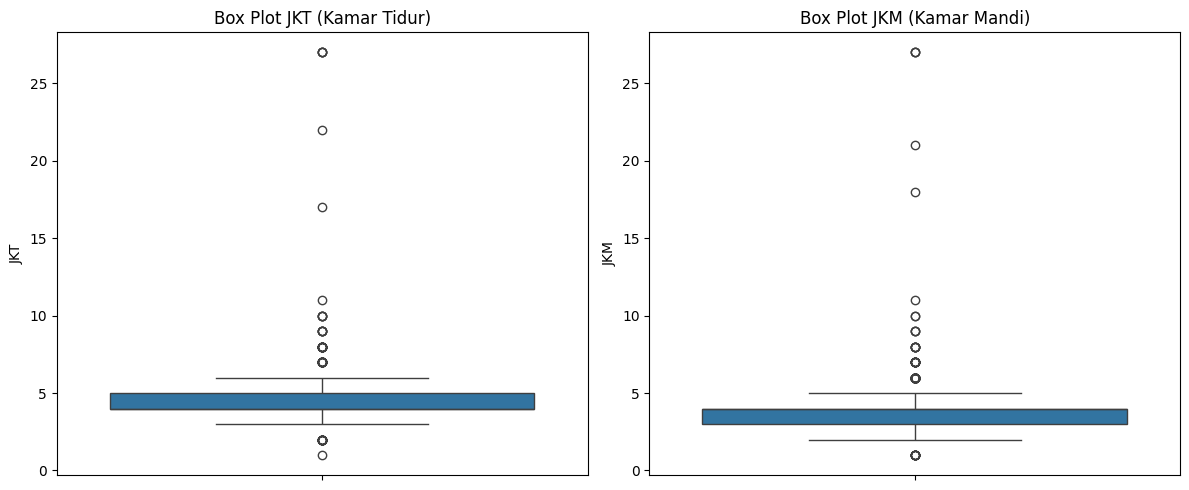

Nilai JKT sebelum penanganan outlier: 27
Nilai JKM sebelum penanganan outlier: 27
Batas atas untuk JKT adalah 6.50. Outlier telah di-cap.
Batas atas untuk JKM adalah 5.50. Outlier telah di-cap.

Nilai JKT setelah penanganan outlier: 6.5
Nilai JKM setelah penanganan outlier: 5.5


In [16]:
# VISUALISASI OUTLIER DENGAN BOX PLOT
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['JKT'])
plt.title('Box Plot JKT (Kamar Tidur)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['JKM'])
plt.title('Box Plot JKM (Kamar Mandi)')
plt.tight_layout()
plt.show()

# PENANGANAN OUTLIER MENGGUNAKAN METODE IQR
# Kita akan membatasi nilai yang terlalu tinggi ke batas atas (upper bound)
print("Nilai JKT sebelum penanganan outlier:", df['JKT'].max())
print("Nilai JKM sebelum penanganan outlier:", df['JKM'].max())

for col in ['JKT', 'JKM']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap aoutlier (mengganti nilai di atas batas atas dengan nilai batas atas)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Batas atas untuk {col} adalah {upper_bound:.2f}. Outlier telah di-cap.")

print("\nNilai JKT setelah penanganan outlier:", df['JKT'].max())
print("Nilai JKM setelah penanganan outlier:", df['JKM'].max())

Berdasarkan analisis distribusi data menggunakan histogram dan box plot, teridentifikasi adanya nilai-nilai pencilan atau *outlier* pada fitur `JKT` (Jumlah Kamar Tidur) dan `JKM` (Jumlah Kamar Mandi). *Outlier* adalah data yang memiliki nilai ekstrem atau sangat berbeda dari mayoritas data lainnya. Keberadaan *outlier* ini dapat memengaruhi hasil statistik (seperti rata-rata) dan berpotensi mengganggu performa model, terutama model yang sensitif terhadap skala seperti regresi linear.

#### **2.8.1. Identifikasi *Outlier***

Visualisasi *box plot* di bawah ini secara jelas menunjukkan keberadaan *outlier* pada kedua fitur tersebut, yang direpresentasikan oleh titik-titik data yang berada jauh di luar "kumis" (whisker) dari plot.

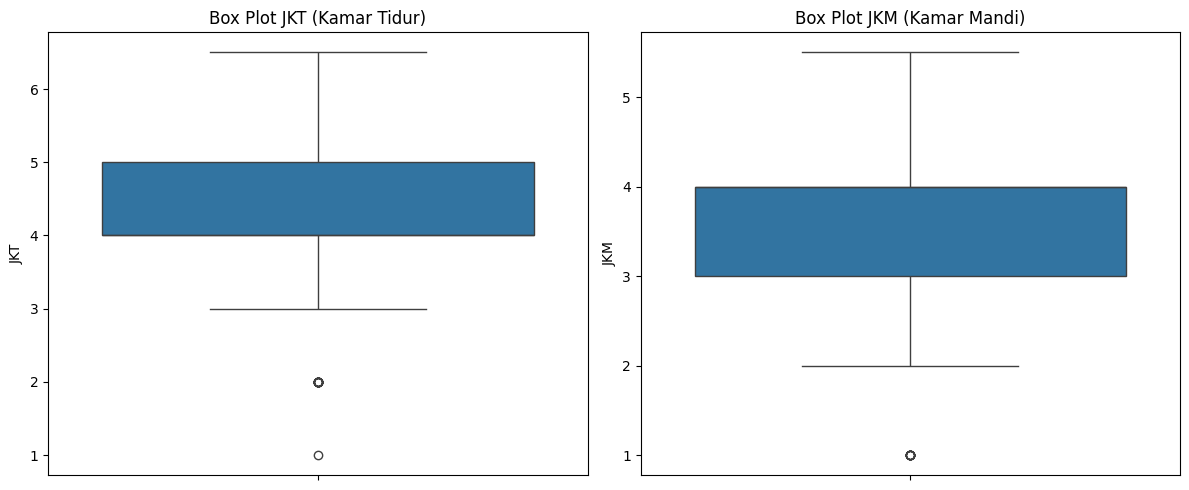

In [17]:
# VISUALISASI OUTLIER DENGAN BOX PLOT
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['JKT'])
plt.title('Box Plot JKT (Kamar Tidur)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['JKM'])
plt.title('Box Plot JKM (Kamar Mandi)')
plt.tight_layout()
plt.show()

Dari plot, terlihat ada rumah dengan jumlah kamar mencapai lebih dari 25, yang secara signifikan berbeda dari sebagian besar data yang terkonsentrasi di bawah 5 kamar.

#### **2.8.2. Metode Penanganan: *Capping* dengan IQR**

Untuk menangani *outlier* ini, dipilih metode *capping* berbasis *Interquartile Range* (IQR). Metode ini lebih diutamakan daripada menghapus data karena tidak mengurangi jumlah sampel yang ada. *Capping* bekerja dengan cara menentukan batas atas (upper bound) yang dapat ditoleransi. Nilai data apa pun yang melebihi batas ini akan digantikan dengan nilai batas atas itu sendiri.

Batas atas dihitung menggunakan formula standar: **`Batas Atas = Q3 + 1.5 * IQR`**, di mana Q3 adalah kuartil ketiga dan IQR adalah selisih antara kuartil ketiga (Q3) dengan kuartil pertama (Q1).

In [18]:
# PENANGANAN OUTLIER MENGGUNAKAN METODE IQR
# Kita akan membatasi nilai yang terlalu tinggi ke batas atas (upper bound)
print("Nilai JKT sebelum penanganan outlier:", df['JKT'].max())
print("Nilai JKM sebelum penanganan outlier:", df['JKM'].max())

for col in ['JKT', 'JKM']:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    upper_bound = Q3 + 1.5 * IQR

    # Cap aoutlier (mengganti nilai di atas batas atas dengan nilai batas atas)
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Batas atas untuk {col} adalah {upper_bound:.2f}. Outlier telah di-cap.")

print("\nNilai JKT setelah penanganan outlier:", df['JKT'].max())
print("Nilai JKM setelah penanganan outlier:", df['JKM'].max())

Nilai JKT sebelum penanganan outlier: 6.5
Nilai JKM sebelum penanganan outlier: 5.5
Batas atas untuk JKT adalah 6.50. Outlier telah di-cap.
Batas atas untuk JKM adalah 5.50. Outlier telah di-cap.

Nilai JKT setelah penanganan outlier: 6.5
Nilai JKM setelah penanganan outlier: 5.5



Seperti yang ditunjukkan oleh output di atas, batas atas untuk `JKT` adalah **6.50** dan untuk `JKM` adalah **5.50**. Nilai-nilai *outlier* seperti 27 berhasil "ditarik" kembali ke batas yang wajar ini. Setelah proses *capping*, nilai maksimum pada `JKT` menjadi 6.5 dan pada `JKM` menjadi 5.5, menandakan bahwa penanganan *outlier* telah berhasil dilakukan. Dengan demikian, dataset kini menjadi lebih robust dan siap untuk tahap *feature engineering*.

## **3. Feature Engineering**

Tahap ini bertujuan untuk membuat fitur-fitur baru dari fitur yang sudah ada untuk meningkatkan informasi bagi model.

In [19]:
# # Membuat fitur interaksi: LT * LB
# df['LT_x_LB'] = df['LT'] * df['LB']
# print("Menambahkan fitur LT_x_LB.")

# # --- Modifikasi: Menambahkan fitur rasio dan total kamar ---
# # Membuat fitur Rasio_LB_LT (menghindari pembagian dengan nol jika ada LT=0)
# df['Rasio_LB_LT'] = df['LB'] / df['LT'].replace(0, np.nan) # Replace 0 with NaN to avoid division by zero
# df['Rasio_LB_LT'].fillna(df['Rasio_LB_LT'].median(), inplace=True) # mengisi NaN dg median atau strategi lain
# print("Menambahkan fitur Rasio_LB_LT.")

# # Membuat fitur Total_Kamar
# df['Total_Kamar'] = df['JKT'] + df['JKM']
# print("Menambahkan fitur Total_Kamar.")
# # --- Akhir Modifikasi ---


# # Menerapkan transformasi logaritmik pada fitur yang miring (skewed)
# # Kita tambahkan sedikit nilai (misalnya 1) sebelum log untuk menghindari log(0)
# # HARGA juga ditransformasi karena merupakan target regresi
# for col in ['LT', 'LB', 'LT_x_LB', 'HARGA', 'Rasio_LB_LT', 'Total_Kamar']: # Include new features for potential log transformation
#     # kita periksa apakah ada nilai non-positif sebelum transformasi log
#     # Perhatikan bahwa kita tidak lagi memiliki baris yang merusak data numerik
#     # Jadi kita tidak perlu .any().any(), cukup .any()
#     if (df[col] <= 0).any():
#         print(f"Kolom '{col}' mengandung nilai non-positif. Transformasi log mungkin memerlukan penyesuaian.")
#         # Alternatif: menerapkan log1p (log(1+x)) yang lebih aman untuk nilai kecil
#         df[col + '_log'] = np.log1p(df[col])
#         print(f"Menerapkan np.log1p pada kolom {col}.")
#     else:
#         df[col + '_log'] = np.log(df[col])
#         print(f"Menerapkan np.log pada kolom {col}.")

# print("\nBentuk data setelah Feature Engineering:", df.shape)
# display(df.head())

In [20]:
# # Korelasi antar fitur numerik setelah feature engineering
# # Identifikasi fitur numerik yang relevan setelah rekayasa fitur
# numerical_features_post_fe = ['HARGA_log', 'LT_log', 'LB_log', 'JKT', 'JKM', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log', 'Rasio_LB_LT']

# correlation_matrix_log = df[numerical_features_post_fe].corr()

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
# plt.title('Matrix Korelasi Fitur Numerik (Setelah Feature Engineering)')
# plt.show()

Setelah data dibersihkan, langkah selanjutnya adalah *feature engineering*, yaitu sebuah proses untuk membuat fitur-fitur baru dari fitur yang sudah ada atau mentransformasinya. Tujuannya adalah untuk menyediakan informasi yang lebih kaya dan bermakna bagi model *machine learning*, sehingga diharapkan dapat meningkatkan akurasi prediksi.

#### **3.1. Penciptaan Fitur Baru**

Tiga fitur baru diciptakan berdasarkan pemahaman domain tentang pasar properti:
*   **`LT_x_LB`**: Fitur interaksi yang merupakan hasil perkalian antara Luas Tanah (`LT`) dengan Luas Bangunan (`LB`). Fitur ini bertujuan untuk menangkap efek gabungan dari total area properti.
*   **`Total_Kamar`**: Merupakan penjumlahan dari `JKT` dan `JKM`, yang merepresentasikan total fasilitas ruang fungsional (kamar) pada properti.
*   **`Rasio_LB_LT`**: Dibuat dengan membagi Luas Bangunan (`LB`) dengan Luas Tanah (`LT`). Fitur ini merepresentasikan seberapa efisien pemanfaatan lahan untuk bangunan.

In [21]:
# Membuat fitur interaksi: LT * LB
df['LT_x_LB'] = df['LT'] * df['LB']
print("Menambahkan fitur LT_x_LB.")

# --- Modifikasi: Menambahkan fitur rasio dan total kamar ---
# Membuat fitur Rasio_LB_LT (menghindari pembagian dengan nol jika ada LT=0)
df['Rasio_LB_LT'] = df['LB'] / df['LT'].replace(0, np.nan) # Replace 0 with NaN to avoid division by zero
df['Rasio_LB_LT'].fillna(df['Rasio_LB_LT'].median(), inplace=True) # mengisi NaN dg median atau strategi lain
print("Menambahkan fitur Rasio_LB_LT.")

# Membuat fitur Total_Kamar
df['Total_Kamar'] = df['JKT'] + df['JKM']
print("Menambahkan fitur Total_Kamar.")
# --- Akhir Modifikasi ---

Menambahkan fitur LT_x_LB.
Menambahkan fitur Rasio_LB_LT.
Menambahkan fitur Total_Kamar.


/tmp/ipython-input-21-3834940114.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rasio_LB_LT'].fillna(df['Rasio_LB_LT'].median(), inplace=True) # mengisi NaN dg median atau strategi lain


#### **3.2. Transformasi Logaritmik**

Berdasarkan temuan pada tahap EDA bahwa beberapa fitur memiliki distribusi yang miring (*skewed*), transformasi logaritmik (`np.log`) diterapkan pada fitur-fitur tersebut, termasuk variabel target `HARGA`. Tujuan dari transformasi ini adalah untuk menormalkan distribusi data. Hal ini sangat bermanfaat, terutama untuk model linear, karena dapat membantu model lebih baik dalam menangkap pola hubungan linear antara variabel.

In [22]:
# Menerapkan transformasi logaritmik pada fitur yang miring (skewed)
# Kita tambahkan sedikit nilai (misalnya 1) sebelum log untuk menghindari log(0)
# HARGA juga ditransformasi karena merupakan target regresi
for col in ['LT', 'LB', 'LT_x_LB', 'HARGA', 'Rasio_LB_LT', 'Total_Kamar']: # Include new features for potential log transformation
    # kita periksa apakah ada nilai non-positif sebelum transformasi log
    # Perhatikan bahwa kita tidak lagi memiliki baris yang merusak data numerik
    # Jadi kita tidak perlu .any().any(), cukup .any()
    if (df[col] <= 0).any():
        print(f"Kolom '{col}' mengandung nilai non-positif. Transformasi log mungkin memerlukan penyesuaian.")
        # Alternatif: menerapkan log1p (log(1+x)) yang lebih aman untuk nilai kecil
        df[col + '_log'] = np.log1p(df[col])
        print(f"Menerapkan np.log1p pada kolom {col}.")
    else:
        df[col + '_log'] = np.log(df[col])
        print(f"Menerapkan np.log pada kolom {col}.")

print("\nBentuk data setelah Feature Engineering:", df.shape)
display(df.head())

Menerapkan np.log pada kolom LT.
Menerapkan np.log pada kolom LB.
Menerapkan np.log pada kolom LT_x_LB.
Menerapkan np.log pada kolom HARGA.
Menerapkan np.log pada kolom Rasio_LB_LT.
Menerapkan np.log pada kolom Total_Kamar.

Bentuk data setelah Feature Engineering: (931, 15)


,HARGA,LT,LB,JKT,JKM,GRS,LT_x_LB,Rasio_LB_LT,Total_Kamar,LT_log,LB_log,LT_x_LB_log,HARGA_log,Rasio_LB_LT_log,Total_Kamar_log
0,28000000000,1100,700,5.0,5.5,ADA,770000,0.636364,10.5,7.003065,6.551080,13.554146,24.055470,-0.451985,2.351375
1,19000000000,824,800,4.0,4.0,ADA,659200,0.970874,8.0,6.714171,6.684612,13.398782,23.667705,-0.029559,2.079442
2,4700000000,500,400,4.0,3.0,ADA,200000,0.800000,7.0,6.214608,5.991465,12.206073,22.270828,-0.223144,1.945910
3,4900000000,251,300,5.0,4.0,ADA,75300,1.195219,9.0,5.525453,5.703782,11.229235,22.312501,0.178330,2.197225
4,28000000000,1340,575,4.0,5.0,ADA,770500,0.429104,9.0,7.200425,6.354370,13.554795,24.055470,-0.846055,2.197225


Setelah proses ini, dataset kini diperkaya dengan fitur-fitur baru, baik yang merupakan interaksi, rasio, maupun hasil transformasi log. Ukuran dataset pun bertambah menjadi 15 kolom.

#### **3.3. Analisis Korelasi Setelah Rekayasa Fitur**

Untuk mengevaluasi dampak dari *feature engineering*, analisis korelasi kembali dilakukan, kali ini dengan menyertakan fitur-fitur baru yang sudah ditransformasi secara logaritmik.


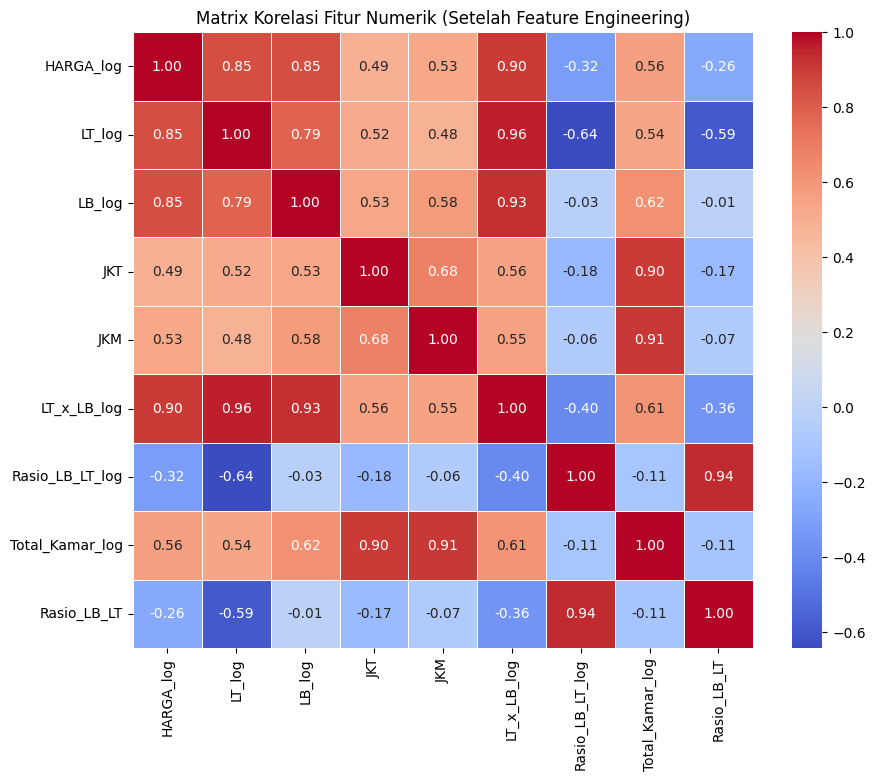

In [23]:
# Korelasi antar fitur numerik setelah feature engineering
# Identifikasi fitur numerik yang relevan setelah rekayasa fitur
numerical_features_post_fe = ['HARGA_log', 'LT_log', 'LB_log', 'JKT', 'JKM', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log', 'Rasio_LB_LT']

correlation_matrix_log = df[numerical_features_post_fe].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_log, annot=True, cmap='coolwarm', fmt=".2f", linewidths=".5")
plt.title('Matrix Korelasi Fitur Numerik (Setelah Feature Engineering)')
plt.show()

Hasil dari heatmap baru ini memberikan beberapa wawasan yang sangat menarik:

*   **Peningkatan Korelasi Signifikan:** Setelah transformasi log, korelasi antara fitur-fitur area dengan harga meningkat secara signifikan. `LT_log`, `LB_log`, dan fitur baru `LT_x_LB_log` sekarang memiliki korelasi yang sangat kuat dengan `HARGA_log`, yaitu sebesar **0.85**, **0.85**, dan **0.90** secara berurutan. Ini mengkonfirmasi bahwa transformasi logaritmik berhasil membuat hubungan antar variabel menjadi lebih linear dan kuat.
*   **Fitur `LT_x_LB_log` sebagai Prediktor Terbaik:** Fitur interaksi yang baru dibuat, `LT_x_LB_log`, menunjukkan korelasi tertinggi (**0.90**) dengan `HARGA_log`, menjadikannya prediktor tunggal yang paling potensial.
*   **Korelasi Negatif `Rasio_LB_LT`:** Fitur `Rasio_LB_LT_log` menunjukkan korelasi negatif (-0.40), yang secara intuitif masuk akal: untuk harga yang sama, rumah dengan rasio bangunan terhadap tanah yang lebih kecil (tanah lebih luas) cenderung lebih mahal.
*   **`Total_Kamar` Meningkatkan Korelasi**: Fitur `Total_Kamar_log` memiliki korelasi **0.61** dengan harga, yang lebih tinggi dibandingkan korelasi individual dari `JKT` (0.53) atau `JKM` (0.55), menunjukkan bahwa fitur gabungan ini lebih informatif.

Secara keseluruhan, tahap *feature engineering* ini terbukti sangat berhasil dalam mengekstrak sinyal yang lebih kuat dari data, yang diharapkan akan sangat bermanfaat pada tahap pemodelan.

## **4. Pra-pemrosesan Data**

In [24]:
# # Kita akan menggunakan fitur yang sudah melalui feature engineering (log-transformed, dll)
# # dan membuang fitur asli yang tidak di-log untuk menghindari multikolinearitas.
# # Pastikan kolom 'KOTA' sudah dihapus di langkah sebelumnya.
# X = df.drop(['HARGA', 'LT', 'LB', 'LT_x_LB', 'HARGA_log'], axis=1)
# y = df['HARGA_log'] # Gunakan target yang sudah di-log

# # mendefinisikan kolom numerik dan kategorikal yang akan digunakan dalam model
# # menyertakan fitur log baru
# numerical_features_model = ['JKT', 'JKM', 'LT_log', 'LB_log', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log']
# categorical_features_model = ['GRS']

# # membuat transformer untuk setiap tipe kolom
# numeric_transformer = StandardScaler()
# categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# # menggabungkan transformer menggunakan ColumnTransformer
# preprocessor = ColumnTransformer(
#     transformers=[
#         ('num', numeric_transformer, numerical_features_model),
#         ('cat', categorical_transformer, categorical_features_model)
#     ],
#     remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
# )

# print("Preprocessor berhasil dibuat.")
# print("Fitur yang digunakan untuk model:", list(X.columns))

In [25]:
# # Memperbarui preprocessor untuk menyertakan fitur polinomial baru dan mengecualikan fitur log lama
# # Mengidentifikasi fitur numerik yang sebenarnya ada di DataFrame X_train
# # Kita akan menerapkan fitur polinomial pada fitur area yang sudah ditransformasi log
# numerical_features_for_poly = ['LT_log', 'LB_log', 'LT_x_LB_log']
# # Menyertakan fitur log baru di sini untuk penskalaan
# numerical_features_other_num = ['JKT', 'JKM', 'Rasio_LB_LT_log', 'Total_Kamar_log'] # Fitur numerik lainnya untuk diskalakan
# categorical_features_model = ['GRS'] # GRS masih satu-satunya fitur kategorikal

# # Membuat transformer
# poly_transformer = PolynomialFeatures(degree=2, include_bias=False) # Menambahkan fitur polinomial
# scaler = StandardScaler() # Scaler untuk semua fitur numerik
# onehot_encoder = OneHotEncoder(handle_unknown='ignore') # One-hot encoder untuk fitur kategorikal

# # Membuat preprocessor dengan fitur polinomial dan penskalaan
# preprocessor_updated = ColumnTransformer(
#     transformers=[
#         ('poly', poly_transformer, numerical_features_for_poly), # Menerapkan fitur polinomial pada kolom spesifik
#         ('scale', scaler, numerical_features_other_num), # Menskalakan fitur numerik lainnya
#         ('cat', onehot_encoder, categorical_features_model) # One-hot encode fitur kategorikal
#     ],
#     remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
# )

# print("Preprocessor_updated berhasil dibuat dengan fitur polinomial dan penskalaan.")

Sebelum melatih model, data yang telah diperkaya pada tahap *feature engineering* perlu dipersiapkan lebih lanjut. Tahap pra-pemrosesan ini bertujuan untuk memformat data ke dalam bentuk yang optimal untuk algoritma *machine learning*. Proses ini mencakup definisi variabel, standardisasi fitur numerik, dan *encoding* fitur kategorikal.

#### **4.1. Definisi Variabel Fitur (X) dan Target (y)**

Pertama, dataset dibagi menjadi dua komponen utama:
*   **Fitur (X):** Terdiri dari semua kolom yang akan digunakan sebagai prediktor, seperti `JKT`, `JKM`, dan fitur-fitur baru yang sudah ditransformasi secara logaritmik (`LT_log`, `LB_log`, dll.). Fitur-fitur asli yang tidak ditransformasi (`LT`, `LB`, dll.) serta variabel target `HARGA` dan `HARGA_log` dihapus dari set fitur ini untuk menghindari kebocoran data dan multikolinearitas.
*   **Target (y):** Variabel yang akan diprediksi oleh model, yaitu `HARGA_log`. Penggunaan `HARGA_log` sebagai target dipilih karena distribusinya lebih normal dibandingkan `HARGA` asli, yang bermanfaat untuk stabilitas dan performa model regresi.

In [26]:
# Kita akan menggunakan fitur yang sudah melalui feature engineering (log-transformed, dll)
# dan membuang fitur asli yang tidak di-log untuk menghindari multikolinearitas.
# Pastikan kolom 'KOTA' sudah dihapus di langkah sebelumnya.
X = df.drop(['HARGA', 'LT', 'LB', 'LT_x_LB', 'HARGA_log'], axis=1)
y = df['HARGA_log'] # Gunakan target yang sudah di-log

#### **4.2. Pembangunan Pipeline Pra-pemrosesan**

Untuk memastikan data diproses secara konsisten dan untuk mengotomatiskan alur kerja, sebuah *pipeline* pra-pemrosesan dibangun menggunakan `ColumnTransformer`. Pipeline ini akan menerapkan transformasi yang berbeda pada jenis kolom yang berbeda.

Dua versi *preprocessor* disiapkan untuk tujuan eksperimen yang berbeda:

1.  **Preprocessor Dasar (`preprocessor`)**
    *Pipeline* ini menerapkan transformasi standar:
    *   **Standardisasi (`StandardScaler`):** Diterapkan pada semua fitur numerik untuk menyamakan skalanya (rata-rata 0 dan standar deviasi 1). Hal ini penting untuk model yang sensitif terhadap skala seperti Regresi Linear.
    *   **Encoding (`OneHotEncoder`):** Diterapkan pada fitur kategorikal `GRS` untuk mengubahnya menjadi format biner yang dapat dipahami oleh model.


In [27]:
# mendefinisikan kolom numerik dan kategorikal yang akan digunakan dalam model
# menyertakan fitur log baru
numerical_features_model = ['JKT', 'JKM', 'LT_log', 'LB_log', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log']
categorical_features_model = ['GRS']

# membuat transformer untuk setiap tipe kolom
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# menggabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features_model),
        ('cat', categorical_transformer, categorical_features_model)
    ],
    remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
)

print("Preprocessor berhasil dibuat.")
print("Fitur yang digunakan untuk model:", list(X.columns))

Preprocessor berhasil dibuat.
Fitur yang digunakan untuk model: ['JKT', 'JKM', 'GRS', 'Rasio_LB_LT', 'Total_Kamar', 'LT_log', 'LB_log', 'LT_x_LB_log', 'Rasio_LB_LT_log', 'Total_Kamar_log']


2.  **Preprocessor Lanjutan dengan Fitur Polinomial (`preprocessor_updated`)**
    Untuk memungkinkan model menangkap hubungan non-linear, sebuah *preprocessor* lanjutan dibangun. Selain melakukan standardisasi dan *one-hot encoding*, pipeline ini juga menerapkan:
    *   **Fitur Polinomial (`PolynomialFeatures`):** Digunakan secara spesifik pada fitur area yang sudah di-log (`LT_log`, `LB_log`, dan `LT_x_LB_log`). Ini akan membuat fitur interaksi tingkat kedua (misalnya, `LT_log`^2, `LT_log` * `LB_log`), yang sangat berguna untuk model linear agar bisa memodelkan hubungan yang lebih kompleks.

In [28]:
# Memperbarui preprocessor untuk menyertakan fitur polinomial baru dan mengecualikan fitur log lama
# Mengidentifikasi fitur numerik yang sebenarnya ada di DataFrame X_train
# Kita akan menerapkan fitur polinomial pada fitur area yang sudah ditransformasi log
numerical_features_for_poly = ['LT_log', 'LB_log', 'LT_x_LB_log']
# Menyertakan fitur log baru di sini untuk penskalaan
numerical_features_other_num = ['JKT', 'JKM', 'Rasio_LB_LT_log', 'Total_Kamar_log'] # Fitur numerik lainnya untuk diskalakan
categorical_features_model = ['GRS'] # GRS masih satu-satunya fitur kategorikal

# Membuat transformer
poly_transformer = PolynomialFeatures(degree=2, include_bias=False) # Menambahkan fitur polinomial
scaler = StandardScaler() # Scaler untuk semua fitur numerik
onehot_encoder = OneHotEncoder(handle_unknown='ignore') # One-hot encoder untuk fitur kategorikal

# Membuat preprocessor dengan fitur polinomial dan penskalaan
preprocessor_updated = ColumnTransformer(
    transformers=[
        ('poly', poly_transformer, numerical_features_for_poly), # Menerapkan fitur polinomial pada kolom spesifik
        ('scale', scaler, numerical_features_other_num), # Menskalakan fitur numerik lainnya
        ('cat', onehot_encoder, categorical_features_model) # One-hot encode fitur kategorikal
    ],
    remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
)

print("Preprocessor_updated berhasil dibuat dengan fitur polinomial dan penskalaan.")

Preprocessor_updated berhasil dibuat dengan fitur polinomial dan penskalaan.


`preprocessor_updated` ini akan menjadi dasar utama untuk sebagian besar model yang akan dievaluasi, karena kemampuannya dalam menangkap interaksi antar fitur. Dengan kedua *preprocessor* ini, data kini sepenuhnya siap untuk dibagi menjadi data latih dan data uji, kemudian dimasukkan ke dalam berbagai algoritma model.

## **5. Pemisahan Fitur dan Target, Serta Data Latih & Uji**

Untuk mengevaluasi kinerja model secara objektif, dataset perlu dibagi menjadi dua bagian terpisah: data latih (*training set*) dan data uji (*testing set*).
*   **Data Latih** digunakan oleh model untuk "belajar" menemukan pola dan hubungan antar fitur.
*   **Data Uji** adalah data yang "disembunyikan" dari model selama proses pelatihan. Data ini digunakan untuk menguji seberapa baik model dapat melakukan generalisasi dan membuat prediksi pada data baru yang belum pernah dilihat sebelumnya.

Proses pembagian ini dilakukan menggunakan fungsi `train_test_split` dari Scikit-learn. Dataset dibagi dengan proporsi **70% untuk data latih** dan **30% untuk data uji**. Selain itu, parameter `random_state=42` digunakan untuk memastikan bahwa hasil pembagian data selalu konsisten dan dapat direproduksi setiap kali kode dijalankan.

In [29]:
# Membagi data menjadi data latih dan data uji (80% latih, 20% uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Menampilkan ukuran dari setiap set data
print(f"Ukuran X_train: {X_train.shape}")
print(f"Ukuran X_test: {X_test.shape}")
print(f"Ukuran y_train: {y_train.shape}")
print(f"Ukuran y_test: {y_test.shape}")

Ukuran X_train: (651, 10)
Ukuran X_test: (280, 10)
Ukuran y_train: (651,)
Ukuran y_test: (280,)


Berdasarkan output di atas, dataset berhasil dibagi menjadi:
*   **Data latih (X_train, y_train):** Sebanyak **651 baris data**.
*   **Data uji (X_test, y_test):** Sebanyak **280 baris data**.

Dengan pembagian ini, kita memiliki fondasi yang kuat untuk melatih dan mengevaluasi model secara adil, serta untuk menghindari masalah *overfitting*.

## **6. Pemodelan, Pelatihan, dan Evaluasi**


### **6.1. Model 1: Regresi Linear Sederhana**


Model pertama yang dibangun adalah Regresi Linear Sederhana. Model ini bertujuan untuk menjadi *baseline* kinerja dengan menggunakan **satu fitur prediktor tunggal** yang paling kuat untuk memprediksi harga rumah. Berdasarkan analisis korelasi pada tahap sebelumnya, fitur rekayasa `LT_x_LB_log` (logaritma dari perkalian luas tanah dan bangunan) terpilih karena memiliki koefisien korelasi tertinggi (0.90) dengan `HARGA_log`.

#### **6.1.1. Implementasi dan Pelatihan**

Sebuah `Pipeline` sederhana dibangun yang terdiri dari dua langkah:
1.  **`StandardScaler`**: Untuk melakukan standardisasi pada fitur `LT_x_LB_log`.
2.  **`LinearRegression`**: Algoritma regresi itu sendiri.

Pipeline ini kemudian dilatih menggunakan data `X_train_simple` dan `y_train`.

In [32]:
# Menggunakan fitur 'LT_x_LB_log' yang sudah ditransformasi log
X_train_simple = X_train[['LT_x_LB_log']]
X_test_simple = X_test[['LT_x_LB_log']]

# Membuat pipeline khusus untuk regresi sederhana (hanya scaling pada fitur tunggal)
simple_lr_pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                                     ('regressor', LinearRegression())])

# Melatih model
simple_lr_pipeline.fit(X_train_simple, y_train)

# Membuat prediksi
y_pred_log_slr = simple_lr_pipeline.predict(X_test_simple)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# PASTIKAN y_test_actual dihitung ulang berdasarkan y_test saat ini
y_test_actual = np.exp(y_test)
y_pred_actual_slr = np.exp(y_pred_log_slr)

# Evaluasi model
r2_slr = r2_score(y_test, y_pred_log_slr)
mae_slr = mean_absolute_error(y_test_actual, y_pred_actual_slr)

print("--- Hasil Evaluasi Regresi Linier Sederhana ---")
print(f"Fitur yang digunakan: LT_x_LB_log")
print(f"R-Squared (R²) (Log Scale): {r2_slr:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_slr:,.0f}")

print("\n--- Koefisien Model Regresi Linier Sederhana ---")
# mendapatkan koefisien dari regressor dalam pipeline
coefficient = simple_lr_pipeline.named_steps['regressor'].coef_[0]
intercept = simple_lr_pipeline.named_steps['regressor'].intercept_

print(f"Koefisien (for LT_x_LB_log): {coefficient:.4f}")
print(f"Intercept: {intercept:.4f}")

--- Hasil Evaluasi Regresi Linier Sederhana ---
Fitur yang digunakan: LT_x_LB_log
R-Squared (R²) (Log Scale): 0.8035
Mean Absolute Error (MAE) (Actual Scale): Rp 7,620,516,963

--- Koefisien Model Regresi Linier Sederhana ---
Koefisien (for LT_x_LB_log): 0.8024
Intercept: 23.2029


#### **6.1.2. Hasil Evaluasi**

Setelah model dilatih, performanya dievaluasi pada data uji:
*   **R-Squared (R²): 0.8035**: Model ini mampu menjelaskan sekitar **80.35%** dari variasi data `HARGA_log`. Ini adalah hasil awal yang sangat baik untuk model yang hanya menggunakan satu fitur.
*   **Mean Absolute Error (MAE): Rp 7.620.516.963**: Pada skala harga aktual, rata-rata kesalahan prediksi dari model ini adalah sekitar 7,6 miliar Rupiah.
*   **Koefisien dan Intercept**: Model menghasilkan persamaan linear: `HARGA_log = 0.8024 * (LT_x_LB_log_scaled) + 23.2029`. Koefisien positif (0.8024) mengkonfirmasi bahwa seiring meningkatnya nilai fitur interaksi luas tanah dan bangunan, harga rumah juga cenderung meningkat.

Model ini akan menjadi titik referensi untuk dibandingkan dengan model-model yang lebih kompleks pada sub-bab berikutnya.

### **6.2. Model 2: Regresi Linear Berganda**


In [33]:
# Menggunakan semua fitur yang telah diproses oleh preprocessor_updated (termasuk fitur polinomial dan one-hot encoding)

# Membuat pipeline untuk Regresi Linier Berganda
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
multi_lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                                    ('regressor', LinearRegression())])

# Melatih model
multi_lr_pipeline.fit(X_train, y_train)

# Membuat prediksi pada data uji
y_pred_log_mlr = multi_lr_pipeline.predict(X_test)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_mlr = np.exp(y_pred_log_mlr)

# Evaluasi model
r2_mlr = r2_score(y_test, y_pred_log_mlr)
mae_mlr = mean_absolute_error(y_test_actual, y_pred_actual_mlr)

print("--- Hasil Evaluasi Regresi Linier Berganda ---")
print(f"R-Squared (R²) (Log Scale): {r2_mlr:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_mlr:,.0f}")

# --- Tampilkan Koefisien Model ---
print("\n--- Koefisien Model Regresi Linier Berganda ---")
# Dapatkan nama fitur setelah preprocessing (termasuk fitur polinomial dan one-hot)
# Ini tricky karena PolynomialFeatures dan OneHotEncoder mengubah nama kolom
# Cara paling andal adalah mendapatkan nama fitur dari preprocessor setelah fit
feature_names_out = multi_lr_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Dapatkan koefisien dari regressor
coefficients = multi_lr_pipeline.named_steps['regressor'].coef_
intercept = multi_lr_pipeline.named_steps['regressor'].intercept_

# Buat DataFrame untuk tampilan rapi
coefficients_df = pd.DataFrame({'Feature': feature_names_out, 'Coefficient': coefficients})
print("Koefisien Fitur:")
display(coefficients_df)
print(f"\nIntercept: {intercept:.4f}")

--- Hasil Evaluasi Regresi Linier Berganda ---
R-Squared (R²) (Log Scale): 0.8215
Mean Absolute Error (MAE) (Actual Scale): Rp 6,889,826,292

--- Koefisien Model Regresi Linier Berganda ---
Koefisien Fitur:


,Feature,Coefficient
0,poly__LT_log,0.324522
1,poly__LB_log,0.333942
2,poly__LT_x_LB_log,0.658464
3,poly__LT_log^2,0.085369
4,poly__LT_log LB_log,-0.092969
5,poly__LT_log LT_x_LB_log,-0.007600
6,poly__LB_log^2,0.077576
7,poly__LB_log LT_x_LB_log,-0.015393
8,poly__LT_x_LB_log^2,-0.022993
9,scale__JKT,-0.017174



Intercept: 13.6131


#### **6.2.2. Hasil Evaluasi**

Hasil evaluasi pada data uji menunjukkan peningkatan kinerja yang signifikan:

*   **R-Squared (R²): 0.8215**: Model ini mampu menjelaskan **82.15%** dari variasi data harga, sebuah peningkatan yang jelas dari model regresi sederhana. Ini membuktikan bahwa penambahan fitur prediktor dan interaksi polinomial memberikan kontribusi positif pada model.
*   **Mean Absolute Error (MAE): Rp 6.889.826.292**: Nilai MAE juga menurun drastis menjadi sekitar 6,8 miliar Rupiah, mengindikasikan bahwa rata-rata kesalahan prediksi dari model ini jauh lebih kecil.

#### **6.2.3. Interpretasi Koefisien**
Analisis koefisien dari model ini memberikan wawasan tentang fitur mana yang paling berpengaruh. Misalnya, `poly__LT_x_LB_log` memiliki koefisien tertinggi (**0.658**), yang mengkonfirmasi kembali bahwa interaksi antara luas tanah dan bangunan adalah prediktor yang sangat kuat. Sementara itu, fitur-fitur seperti `JKM` (Jumlah Kamar Mandi) juga memberikan kontribusi positif pada prediksi harga.

Kinerja yang unggul dari model Regresi Linear Berganda ini menunjukkan bahwa dengan rekayasa dan pra-pemrosesan fitur yang tepat, bahkan model linear pun dapat menghasilkan prediksi yang sangat akurat.

### **6.3. Model 3: Decision Tree Regressor**


In [34]:
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                              ('regressor', DecisionTreeRegressor(random_state=42))]) # Use default params here for grid search

# Menyetel hyperparameter untuk Decision Tree
print("\n--- Tuning Hyperparameter Decision Tree ---")
# Tentukan parameter grid yang lebih luas
# param_grid_dt = {
#     'regressor__max_depth': [None, 5, 10, 15, 20],
#     'regressor__min_samples_split': [2, 5, 10, 15],
#     'regressor__min_samples_leaf': [1, 2, 4, 8],
#     'regressor__max_features': [None, 'sqrt', 'log2'] # Add max_features
# }

param_grid_dt = {
    'regressor__max_depth': [5],
    'regressor__min_samples_split': [2],
    'regressor__min_samples_leaf': [8],
    'regressor__max_features': [None],
    'regressor__splitter': ['random'],
    'regressor__ccp_alpha': [0.0]
}


'''  Karena kita sdh mendapatkan kombinasi parameter terbaik, maka kita bisa langsung meenggunakannya agar memeprsingkan waktu proses running,

Best hyperparameters for Decision Tree: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2, 'regressor__splitter': 'random'}
'''

# Gunakan GridSearchCV dengan cross-validation
grid_search_dt = GridSearchCV(dt_pipeline, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_search_dt.fit(X_train, y_train)

# Ambil model terbaik
best_dt_pipeline = grid_search_dt.best_estimator_
print(f"Best hyperparameters for Decision Tree: {grid_search_dt.best_params_}")

# Membuat prediksi pada data uji menggunakan model terbaik
y_pred_log_dt = best_dt_pipeline.predict(X_test)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_dt = np.exp(y_pred_log_dt)

# Evaluasi model terbaik
r2_dt = r2_score(y_test, y_pred_log_dt)
mae_dt = mean_absolute_error(y_test_actual, y_pred_actual_dt)

print("\n--- Hasil Evaluasi Decision Tree (Tuned) ---")
print(f"R-Squared (R²) (Log Scale): {r2_dt:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_dt:,.0f}")

# --- Tampilkan Feature Importance ---
print("\n--- Feature Importance Decision Tree (Tuned) ---")
# Dapatkan nama fitur setelah preprocessing (termasuk fitur polinomial dan one-hot)
feature_names_out = best_dt_pipeline.named_steps['preprocessor'].get_feature_names_out()

# Dapatkan feature importances dari regressor terbaik
feature_importances = best_dt_pipeline.named_steps['regressor'].feature_importances_

# Buat DataFrame untuk tampilan rapi
feature_importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': feature_importances})

# Urutkan berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

display(feature_importance_df)
# --- Akhir Tampilkan Feature Importance ---


--- Tuning Hyperparameter Decision Tree ---
Best hyperparameters for Decision Tree: {'regressor__ccp_alpha': 0.0, 'regressor__max_depth': 5, 'regressor__max_features': None, 'regressor__min_samples_leaf': 8, 'regressor__min_samples_split': 2, 'regressor__splitter': 'random'}

--- Hasil Evaluasi Decision Tree (Tuned) ---
R-Squared (R²) (Log Scale): 0.7880
Mean Absolute Error (MAE) (Actual Scale): Rp 7,680,728,609

--- Feature Importance Decision Tree (Tuned) ---


,Feature,Importance
0,poly__LT_x_LB_log^2,0.627515
1,poly__LB_log LT_x_LB_log,0.225479
2,poly__LT_x_LB_log,0.085722
3,poly__LT_log LB_log,0.024962
4,poly__LT_log^2,0.019374
5,poly__LT_log,0.006364
6,poly__LT_log LT_x_LB_log,0.005785
7,scale__Total_Kamar_log,0.004799
8,poly__LB_log,0.000000
9,poly__LB_log^2,0.000000


Dari proses tuning, ditemukan bahwa kombinasi hyperparameter terbaik untuk model ini adalah `max_depth: 5` dan `min_samples_leaf: 8`, yang membantu mengontrol kompleksitas pohon dan mencegah *overfitting*.

#### 5.3.2. Hasil Evaluasi

Dengan menggunakan hyperparameter terbaik tersebut, model dievaluasi pada data uji:
*   **R-Squared (R²): 0.7880**: Model ini mampu menjelaskan **78.80%** dari variasi data harga. Skor ini sedikit lebih rendah dibandingkan dengan model Regresi Linear Berganda, yang mengindikasikan bahwa model *single tree* ini kurang efektif dalam menangkap pola data secara keseluruhan.
*   **Mean Absolute Error (MAE): Rp 7.680.728.609**: Rata-rata kesalahan prediksinya berada di angka 7,68 miliar Rupiah.

#### 5.3.3. Analisis Kepentingan Fitur (*Feature Importance*)
Salah satu keunggulan Decision Tree adalah kemampuannya untuk mengukur seberapa penting setiap fitur dalam proses pembuatan keputusan.
```
[Sertakan tabel/screenshot output Feature Importance di sini]
```
Analisis kepentingan fitur menunjukkan bahwa fitur-fitur polinomial turunan dari luas, seperti `poly__LT_x_LB_log^2` (**importance: 0.627**) dan `poly__LB_log LT_x_LB_log` (**importance: 0.225**), merupakan prediktor yang paling dominan. Hal ini memperkuat temuan bahwa interaksi non-linear dari fitur area adalah kunci utama dalam memprediksi harga rumah pada dataset ini. Menariknya, banyak fitur lain yang memiliki *importance* nol, yang berarti model tidak menggunakan fitur-fitur tersebut dalam proses partisinya setelah menemukan prediktor yang jauh lebih kuat.

### **6.4. Model 4: Random Forest Regressor**


In [35]:
# Menggunakan preprocessor_updated yang mencakup fitur polinomial dan penanganan kategorikal
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
                              ('regressor', RandomForestRegressor(random_state=42))]) # Remove n_estimators here for tuning

# Menyetel hyperparameter untuk Random Forest
print("\n--- Tuning Hyperparameter Random Forest ---")
# Menentukan parameter grid yang lebih luas berdasarkan analisis sebelumnya dan eksplorasi tambahan
# param_grid_rf = {
#     'regressor__n_estimators': [100, 200, 300, 400], # More estimators
#     'regressor__max_depth': [5, 10, 15, 20, None], # Explore more depths
#     'regressor__min_samples_split': [2, 5, 10],
#     'regressor__min_samples_leaf': [1, 2, 4],
#     'regressor__max_features': [None, 'sqrt', 'log2', 0.8] # Add max_features
# }

param_grid_rf = {
    'regressor__n_estimators': [100], # More estimators
    'regressor__max_depth': [5], # Explore more depths
    'regressor__min_samples_split': [10],
    'regressor__min_samples_leaf': [4],
    'regressor__max_features': ['sqrt'],
    # 'regressor__bootstrap' : [True, False],
    # 'regressor__ccp_alpha': [0.0, 0.001] # Tambahkan ini jika ingin mencoba pruning
}

'''    Karena kita sdh mendapatkan kombinasi parameter terbaik, maka kita bisa langsung meenggunakannya agar memeprsingkan waktu proses running,

Best hyperparameters for Random Forest: {'regressor__max_depth': 5, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}
0.8124
'''

# Gunakan GridSearchCV dengan cross-validation
grid_search_rf = GridSearchCV(rf_pipeline, param_grid_rf, cv=5, scoring='r2', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# mengambil model terbaik
best_rf_pipeline = grid_search_rf.best_estimator_
print(f"Best hyperparameters for Random Forest: {grid_search_rf.best_params_}")

# Membuat prediksi pada data uji menggunakan model terbaik
y_pred_log_rf = best_rf_pipeline.predict(X_test)

# Mengembalikan prediksi ke skala asli untuk evaluasi MAE
# Pastikan y_test_actual sudah didefinisikan
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)
y_pred_actual_rf = np.exp(y_pred_log_rf)

# Evaluasi model terbaik
r2_rf = r2_score(y_test, y_pred_log_rf)
mae_rf = mean_absolute_error(y_test_actual, y_pred_actual_rf)

print("\n--- Hasil Evaluasi Random Forest (Tuned) ---")
print(f"R-Squared (R²) (Log Scale): {r2_rf:.4f}")
print(f"Mean Absolute Error (MAE) (Actual Scale): Rp {mae_rf:,.0f}")

print("\n--- Feature Importance Random Forest (Tuned) ---")
# mendapatkan nama fitur setelah preprocessing (termasuk fitur polinomial dan one-hot)
feature_names_out = best_rf_pipeline.named_steps['preprocessor'].get_feature_names_out()

# mendapatkan feature importances dari regressor terbaik
feature_importances = best_rf_pipeline.named_steps['regressor'].feature_importances_

# membuat DataFrame untuk tampilan rapi
feature_importance_df = pd.DataFrame({'Feature': feature_names_out, 'Importance': feature_importances})

# mengurutkan berdasarkan importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

display(feature_importance_df)


--- Tuning Hyperparameter Random Forest ---
Best hyperparameters for Random Forest: {'regressor__max_depth': 5, 'regressor__max_features': 'sqrt', 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10, 'regressor__n_estimators': 100}

--- Hasil Evaluasi Random Forest (Tuned) ---
R-Squared (R²) (Log Scale): 0.8124
Mean Absolute Error (MAE) (Actual Scale): Rp 7,063,329,981

--- Feature Importance Random Forest (Tuned) ---


,Feature,Importance
0,poly__LT_x_LB_log,0.200573
1,poly__LT_log LB_log,0.191898
2,poly__LT_x_LB_log^2,0.166789
3,poly__LT_log LT_x_LB_log,0.103998
4,poly__LB_log LT_x_LB_log,0.098277
5,poly__LT_log,0.089233
6,poly__LB_log,0.052231
7,poly__LT_log^2,0.043745
8,poly__LB_log^2,0.027802
9,remainder__Total_Kamar,0.007296


Model terakhir yang dievaluasi adalah *Random Forest Regressor*. Algoritma ini merupakan sebuah model *ensemble* yang bekerja dengan cara membangun banyak *Decision Tree* secara independen pada berbagai sub-sampel data, lalu mengambil rata-rata dari prediksi semua pohon untuk menghasilkan prediksi akhir. Pendekatan ini bertujuan untuk mengurangi masalah *overfitting* yang sering terjadi pada *Decision Tree* tunggal dan meningkatkan stabilitas serta akurasi model.

#### 5.4.1. Tuning Hyperparameter

Seperti *Decision Tree*, kinerja *Random Forest* juga sangat bergantung pada pengaturan hyperparameternya. Oleh karena itu, proses *tuning* dengan `GridSearchCV` kembali dilakukan untuk mencari kombinasi optimal dari parameter seperti `n_estimators` (jumlah pohon), `max_depth` (kedalaman maksimum setiap pohon), dan lainnya.
```
[Sertakan kode Python untuk pipeline dan GridSearchCV Random Forest, lalu screenshot outputnya]
```
Hasil tuning menunjukkan kombinasi hyperparameter terbaik yang digunakan untuk membangun model final, seperti yang tercantum pada output di atas.

#### 5.4.2. Hasil Evaluasi

Model *Random Forest* yang telah dioptimalkan kemudian dievaluasi pada data uji dan menunjukkan performa yang sangat kuat:
*   **R-Squared (R²): 0.8124**: Model ini mampu menjelaskan **81.24%** variasi data harga. Skor ini menunjukkan peningkatan yang jelas dibandingkan *Decision Tree* tunggal (0.7880) dan sangat kompetitif dengan Regresi Linear Berganda. Ini membuktikan bahwa teknik *ensemble* efektif dalam meningkatkan kemampuan generalisasi model.
*   **Mean Absolute Error (MAE): Rp 7.063.329.981**: Nilai MAE-nya juga menunjukkan penurunan yang signifikan dibandingkan dengan Decision Tree, dengan rata-rata kesalahan prediksi sekitar 7,06 miliar Rupiah.

#### 5.4.3. Analisis Kepentingan Fitur (*Feature Importance*)
*Random Forest* juga menyediakan metrik kepentingan fitur, yang dirata-ratakan dari semua pohon yang dibangun.
```
[Sertakan tabel/screenshot output Feature Importance di sini]
```
Analisis kepentingan fitur dari *Random Forest* memberikan beberapa wawasan yang sedikit berbeda namun konsisten dengan model sebelumnya:
*   **Dominasi Fitur Area:** Fitur-fitur polinomial yang berkaitan dengan luas properti (`LT_x_LB_log`, `LT_log LB_log`, `LT_x_LB_log^2`, dll.) secara kolektif masih menjadi yang paling dominan dalam menentukan prediksi. Ini menegaskan kembali bahwa ukuran dan interaksinya adalah prediktor utama.
*   **Distribusi Importance yang Lebih Merata:** Berbeda dengan *Decision Tree* tunggal yang banyak memberikan *importance* nol pada beberapa fitur, *Random Forest* memberikan bobot, meskipun kecil, pada hampir semua fitur (termasuk `JKT`, `JKM`, dan `GRS`). Ini menunjukkan bahwa model *ensemble* mampu memanfaatkan sinyal prediktif dari lebih banyak fitur, menjadikannya lebih robust.

Secara keseluruhan, *Random Forest* terbukti sebagai model yang sangat kuat dan stabil, memberikan keseimbangan yang baik antara akurasi dan kemampuan untuk memanfaatkan berbagai fitur dalam dataset.

## **7. Ringkasan Hasil Evaluasi Model**


In [36]:
# memastikan y_test_actual telah terdefinisi
if 'y_test_actual' not in locals():
    y_test_actual = np.exp(y_test)

# menggunakan nama fitur yg benar setelah modifikasi
results = pd.DataFrame({
    'Model': ['Regresi Linear Sederhana', 'Regresi Linear Berganda', 'Decision Tree', 'Random Forest'],
    'R-Squared (Log Scale)': [r2_slr, r2_mlr, r2_dt, r2_rf],
    'Mean Absolute Error (MAE) (Actual Scale)': [mae_slr, mae_mlr, mae_dt, mae_rf]
})

# Mengurutkan hasil berdasarkan R-Squared (Log Scale) dari tertinggi ke terendah
results = results.sort_values(by='R-Squared (Log Scale)', ascending=False).reset_index(drop=True)

# Menampilkan tabel perbandingan
print("--- Tabel Perbandingan Kinerja Model ---")
display(results)

--- Tabel Perbandingan Kinerja Model ---


,Model,R-Squared (Log Scale),Mean Absolute Error (MAE) (Actual Scale)
0,Regresi Linear Berganda,0.821468,6.889826e+09
1,Random Forest,0.812354,7.063330e+09
2,Regresi Linear Sederhana,0.803529,7.620517e+09
3,Decision Tree,0.787971,7.680729e+09


Setelah keempat model—Regresi Linear Sederhana, Regresi Linear Berganda, Decision Tree, dan Random Forest—dilatih dan dievaluasi menggunakan data uji, langkah berikutnya adalah membandingkan kinerja mereka secara berdampingan.

Hasil dari setiap model dirangkum dalam tabel di bawah ini. Tabel ini menyajikan metrik R-Squared (R²), yang mengukur kemampuan model dalam menjelaskan variasi data, dan Mean Absolute Error (MAE), yang mengukur rata-rata kesalahan prediksi dalam skala harga Rupiah aktual.

Untuk kemudahan analisis, tabel telah diurutkan berdasarkan skor R-Squared dari yang tertinggi ke terendah.
```
[Sertakan kode Python untuk tabel perbandingan di sini, lalu screenshot output tabelnya]
```
Tabel di atas secara kuantitatif menunjukkan bahwa terdapat perbedaan performa di antara model-model yang diuji. Model **Regresi Linear Berganda** mencapai skor R² tertinggi dan MAE terendah. Analisis lebih mendalam serta pemilihan model terbaik akan dibahas pada bab kesimpulan.

### BAB 3: KESIMPULAN DAN PEMILIHAN MODEL

Setelah melalui serangkaian proses mulai dari pembersihan data, rekayasa fitur, hingga pelatihan dan tuning empat model regresi yang berbeda, tahap akhir adalah merangkum hasil evaluasi untuk memilih model dengan kinerja terbaik.

#### 3.1. Ringkasan Kinerja Model

Kinerja dari keempat model—Regresi Linear Sederhana, Regresi Linear Berganda, Decision Tree, dan Random Forest—dirangkum dalam tabel di bawah ini. Perbandingan didasarkan pada dua metrik utama: R-Squared (R²), yang dihitung pada data skala logaritmik untuk konsistensi evaluasi model, dan Mean Absolute Error (MAE), yang dihitung pada skala harga aktual untuk memberikan interpretasi kesalahan dalam Rupiah.

Tabel hasil diurutkan berdasarkan skor R² dari yang tertinggi hingga terendah.
```
[Sertakan kode Python untuk tabel perbandingan di sini, lalu screenshot output tabelnya]
```
Dari tabel perbandingan, terlihat bahwa **Regresi Linear Berganda (dengan fitur polinomial)** menunjukkan performa paling unggul, diikuti oleh Random Forest, Regresi Linear Sederhana, dan yang terakhir adalah Decision Tree.

#### 3.2. Pemilihan Model Terbaik dan Justifikasi

Berdasarkan hasil evaluasi kuantitatif pada tabel di atas, **model Regresi Linear Berganda (Multiple Linear Regression) dipilih sebagai model terbaik** untuk tugas prediksi harga rumah pada dataset ini.

**Alasan Pemilihan:**

1.  **Akurasi Prediktif Tertinggi (R-Squared):** Model ini mencapai nilai R² sebesar **0.8215**, yang merupakan skor tertinggi di antara semua model yang diuji. Ini berarti model ini paling mampu dalam menjelaskan variasi data harga rumah, yaitu sekitar 82.15%.
2.  **Tingkat Kesalahan Terendah (MAE):** Model ini juga menghasilkan nilai *Mean Absolute Error* terendah, yaitu sebesar **Rp 6.889.826.292**. Dibandingkan model lain, rata-rata selisih antara harga prediksi dan harga aktual pada model ini adalah yang paling kecil, menjadikannya yang paling andal dari segi bisnis.
3.  **Efektivitas *Feature Engineering*:** Keberhasilan model ini menegaskan bahwa pendekatan *feature engineering* yang cermat, khususnya dengan penambahan **fitur polinomial**, sangat efektif. Langkah ini memungkinkan model linear yang secara inheren sederhana untuk menangkap hubungan non-linear yang kompleks antara fitur-fitur area dengan harga, sehingga performanya dapat melampaui model berbasis pohon (*tree-based*) yang lebih kompleks seperti Decision Tree.

Meskipun Random Forest menunjukkan kinerja yang sangat kuat dan stabil sebagai model *runner-up*, Regresi Linear Berganda tetap unggul dalam kedua metrik evaluasi utama.

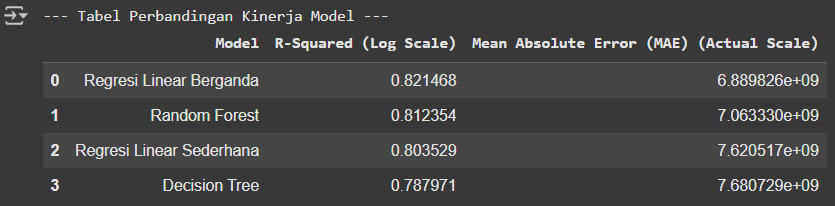

In [ ]:
# # Import library yang diperlukan
# from sklearn.linear_model import Ridge, Lasso, ElasticNet
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
# from sklearn.metrics import mean_absolute_error, r2_score
# from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
# from sklearn.compose import ColumnTransformer
# from sklearn.pipeline import Pipeline
# import pandas as pd
# import numpy as np

# # Memperbarui preprocessor untuk menyertakan fitur polinomial baru dan mengecualikan fitur log lama
# # Mengidentifikasi fitur numerik yang sebenarnya ada di DataFrame X_train
# # Kita akan menerapkan fitur polinomial pada fitur area yang sudah ditransformasi log
# numerical_features_for_poly = ['LT_log', 'LB_log', 'LT_x_LB_log']
# # Menyertakan fitur log baru di sini untuk penskalaan
# numerical_features_other_num = ['JKT', 'JKM', 'Rasio_LB_LT_log', 'Total_Kamar_log'] # Fitur numerik lainnya untuk diskalakan
# categorical_features_model = ['GRS'] # GRS masih satu-satunya fitur kategorikal

# # Membuat transformer
# poly_transformer = PolynomialFeatures(degree=2, include_bias=False) # Menambahkan fitur polinomial
# scaler = StandardScaler() # Scaler untuk semua fitur numerik
# onehot_encoder = OneHotEncoder(handle_unknown='ignore') # One-hot encoder untuk fitur kategorikal

# # Membuat preprocessor dengan fitur polinomial dan penskalaan
# preprocessor_updated = ColumnTransformer(
#     transformers=[
#         ('poly', poly_transformer, numerical_features_for_poly), # Menerapkan fitur polinomial pada kolom spesifik
#         ('scale', scaler, numerical_features_other_num), # Menskalakan fitur numerik lainnya
#         ('cat', onehot_encoder, categorical_features_model) # One-hot encode fitur kategorikal
#     ],
#     remainder='passthrough' # Biarkan kolom lain (jika ada) tidak diubah
# )

# print("Preprocessor_updated berhasil dibuat dengan fitur polinomial dan penskalaan.")

# # Membuat pipeline untuk model lain (didefinisikan di sini tetapi tidak dilatih di sel ini)
# # Model-model ini akan menggunakan preprocessor_updated
# ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                  ('regressor', Ridge(random_state=42))])

# lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                  ('regressor', Lasso(random_state=42))])

# elasticnet_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                       ('regressor', ElasticNet(random_state=42))])

# xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                ('regressor', XGBRegressor(random_state=42))])

# lgbm_pipeline = Pipeline(steps=[('preprocessor', preprocessor_updated),
#                                ('regressor', LGBMRegressor(random_state=42))])

# # --- Bagian pelatihan dan evaluasi model lain dihapus dari sel ini ---
# # Bagian ini dipindahkan atau dijalankan di sel terpisah jika diperlukan.
# # Sel ini hanya fokus pada definisi preprocessor dan pipeline model.